### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


### Business Goal: 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [141]:
## Let us first install all the rquired Libraries used in our Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

#### Data Screening and Prepartion

In [77]:
housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
## Check the number of rows and columns of housing data

housing_data.shape

(1460, 81)

In [79]:
### Now Let us try to see the statistical elements of the numerical data
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [80]:
### Let us try to check the data types of the columns and if there are any null values

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
### Let us check for any null values

housing_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [82]:
# check for columns if they have only one value. 

housing_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [83]:
## Let us try to check the counts

housing_data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [84]:
housing_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [85]:
housing_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [86]:
housing_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

#### Check the % of null values in the columns

In [87]:
df_missing = pd.DataFrame((round(100*(housing_data.isnull().sum()/len(housing_data.index)),2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [88]:
### Checking for NAN values

housing_data['PoolQC'] = housing_data['PoolQC'].fillna('No_Pool')
housing_data['Alley'] = housing_data['Alley'].fillna('No_Alley_Access')
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('No_Fireplace')
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(0)
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('None')
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0)
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0)
housing_data['Electrical'] = housing_data['Electrical'].fillna("Other")
housing_data['MiscFeature'] = housing_data['MiscFeature'].fillna('None')
housing_data['Fence'] = housing_data['Fence'].fillna('No_Fence')

In [89]:
housing_data.drop("LotFrontage",axis = 1, inplace=True)

In [90]:
### Impute the Nan values with 'no garage'

for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    housing_data[col] = housing_data[col].fillna('No_Garage')

In [91]:
### Let us also impute values with No Basement Data

for col in ('BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond'):
    housing_data[col] = housing_data[col].fillna('No_Basement')

In [92]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [93]:
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].astype(int)

### EDA

<Axes: xlabel='SalePrice', ylabel='Density'>

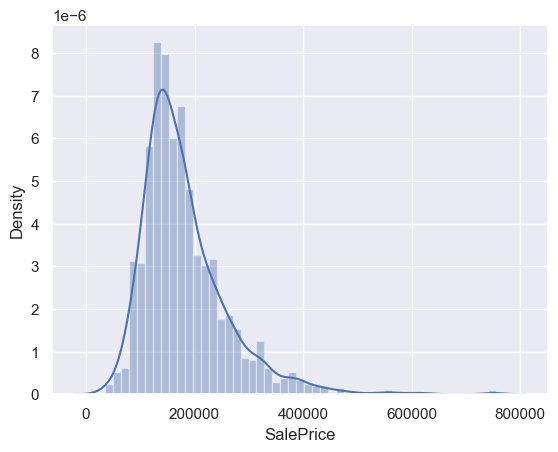

In [94]:
sns.distplot(housing_data['SalePrice'])

In [95]:
# Let's check the Skewnes and Kurtosis

print("Skewness: %f" % housing_data['SalePrice'].skew())
print("Kurtosis: %f" % housing_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Basement Condition')

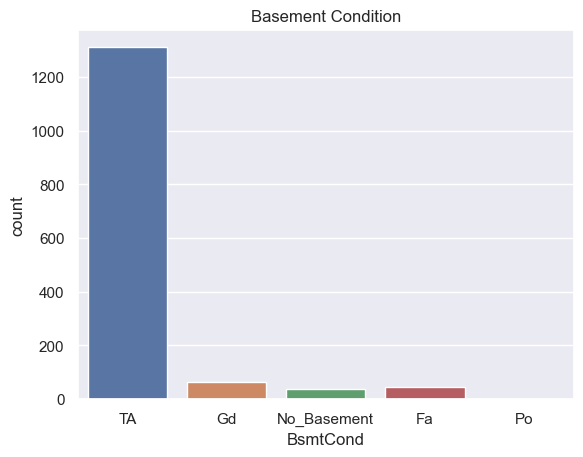

In [96]:
## Checking Basement counts

sns.countplot(x='BsmtCond',data=housing_data)
plt.title('Basement Condition')

<Axes: xlabel='SalePrice'>

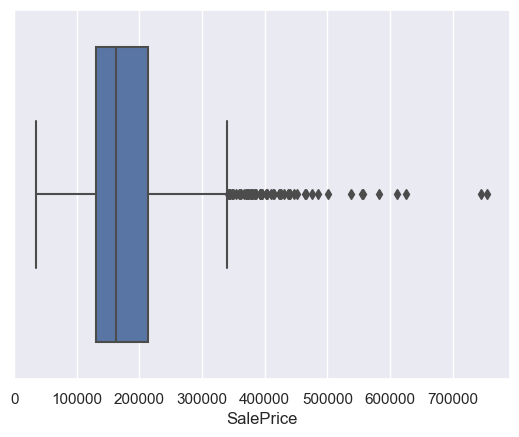

In [97]:
## Check the Outliers

sns.boxplot(x='SalePrice',data=housing_data)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

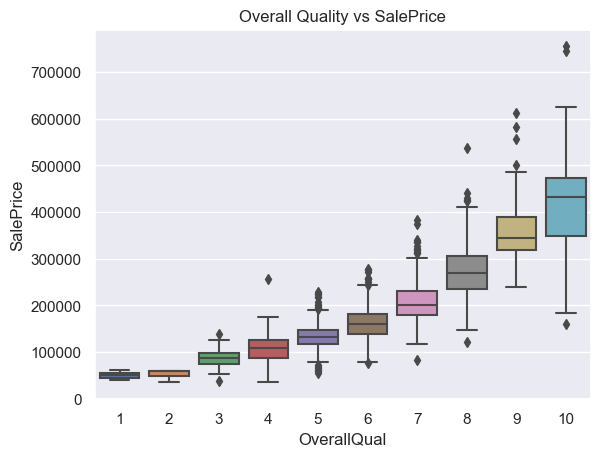

In [98]:
sns.boxplot(x='OverallQual', y='SalePrice', data = housing_data)
plt.title("Overall Quality vs SalePrice")

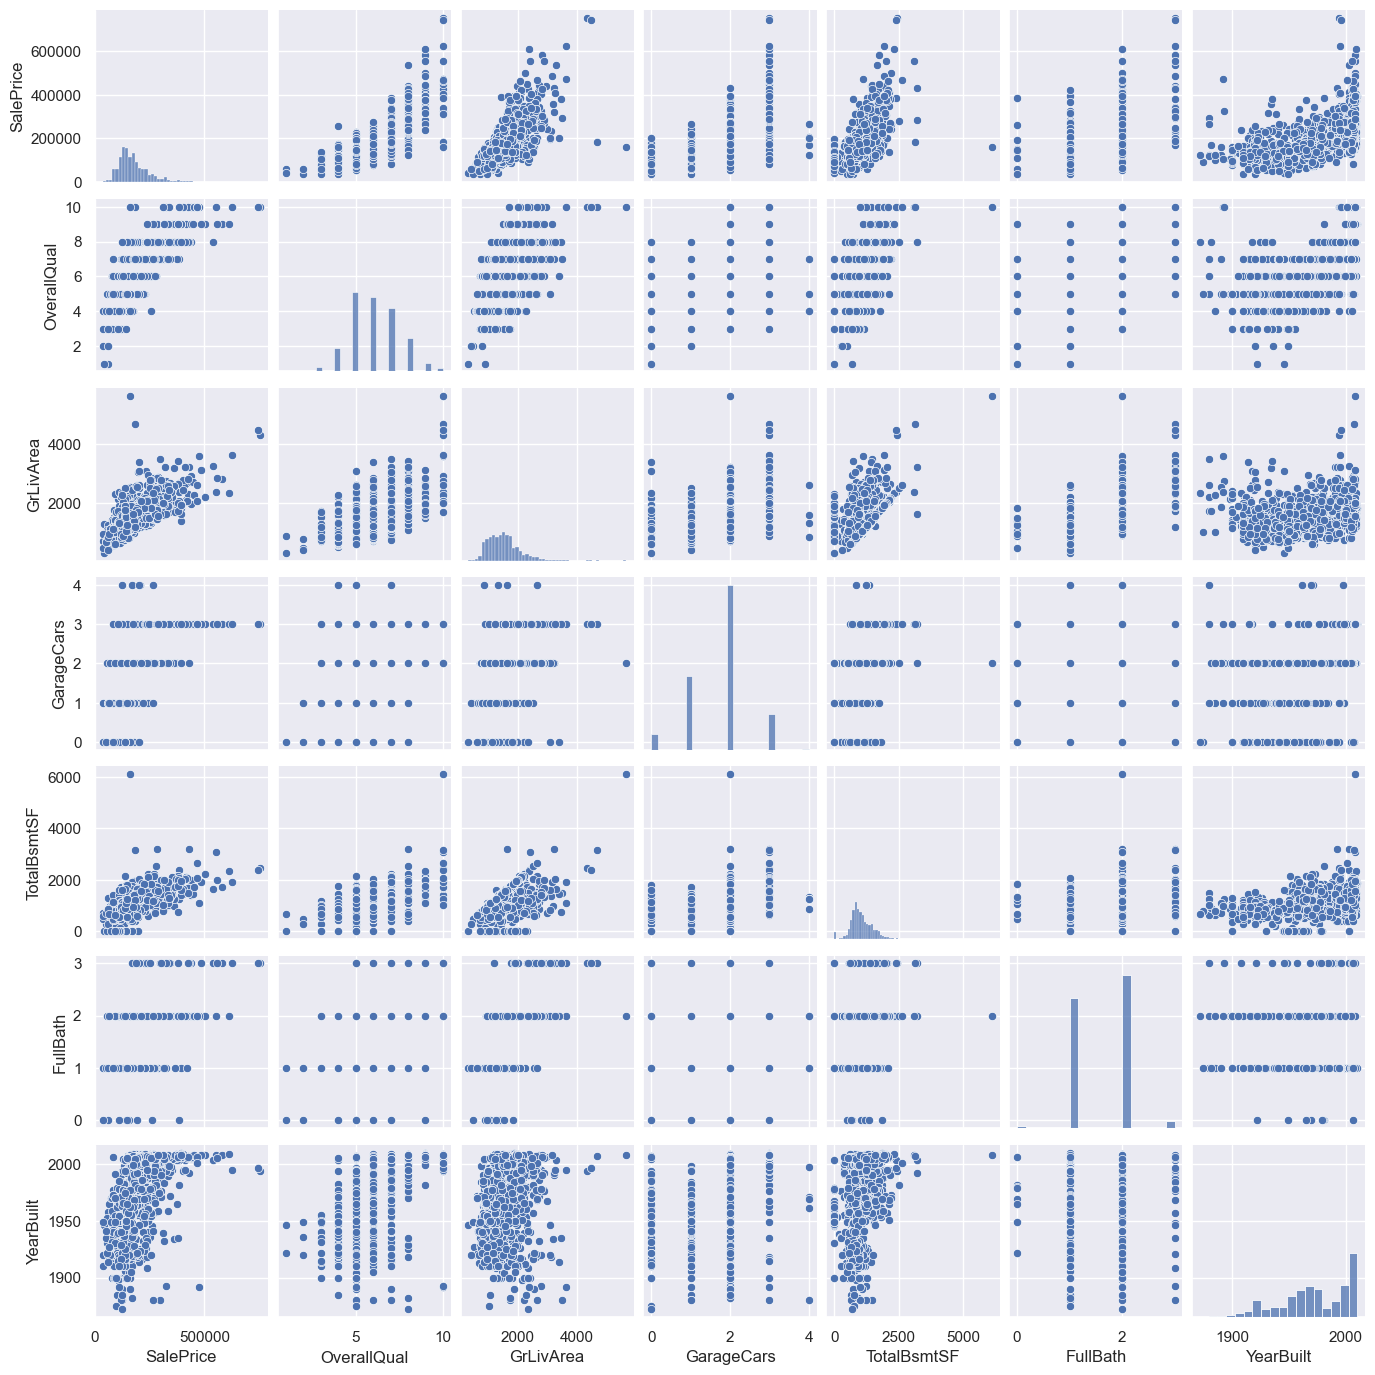

In [99]:
# Scatterplot

sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(housing_data[cols], size = 2.0)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

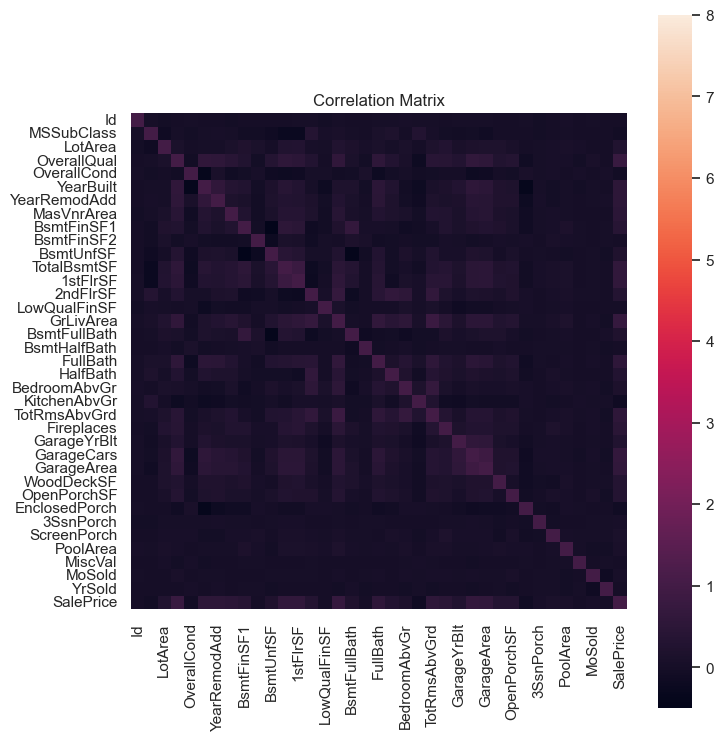

In [100]:
# checking the correlation matrix

comatrix = housing_data.corr()
f, ax = plt.subplots(figsize= (8,9))
sns.heatmap(comatrix, vmax=8, square=True);
plt.title("Correlation Matrix")

<Axes: xlabel='SalePrice', ylabel='Density'>

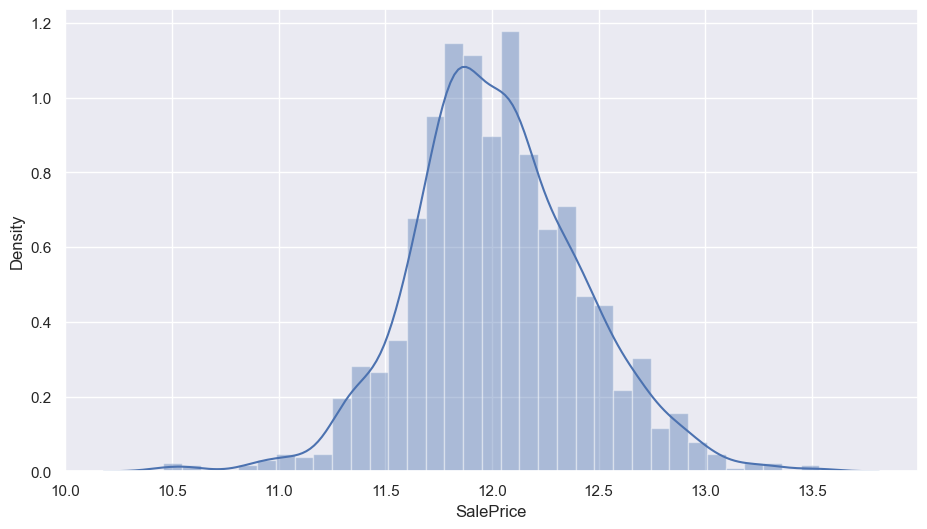

In [101]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(housing_data["SalePrice"]))

#### Derived Metrics

In [102]:
numeric_data = housing_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [103]:
### Convert to Binary variable into numeric dataypes

housing_data['Street'] = housing_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

housing_data['CentralAir'] = housing_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
housing_data['PavedDrive'] = housing_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [104]:
Categ_values = housing_data.select_dtypes(include=['object'])
Categ_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [105]:
### convert ino dummy variables

D_dummies = pd.get_dummies(Categ_values, drop_first=True)
D_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [106]:
df = housing_data.drop(['Id'], axis=1)

In [107]:
df = df.drop(list(Categ_values.columns),axis=1)

In [108]:
df= pd.concat([df,D_dummies],axis = 1)

In [109]:
df.shape

(1460, 259)

### Train Test Split

In [120]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)



In [121]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [122]:
### Data Scaling

scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

### Building the Model

In [123]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [129]:
rfe = RFE(reg, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [130]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'Condition2_PosN', 'Exterior1st_BrkComm',
       'Functional_Sev', 'PoolQC_Gd'],
      dtype='object')

In [133]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)


# Creating the model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     411.7
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          3.10e-241
Time:                        01:59:19   Log-Likelihood:                 61.415
No. Observations:                1021   AIC:                            -110.8
Df Residuals:                    1015   BIC:                            -81.26
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.0249      0.007   1677.287      0.000      12.011      12.039
OverallQual             0.3253      0.007     45.036      0.000       0.311       0.339
Condition2_PosN        -0.8070      0.230     -3.516      0.000      -1.257      -0.357
Exterior1st_BrkComm    -0.3804      0.162     -2.347      0.019      -0.698      -0.062
Functional_Sev         -0.2361      0.229     -1.033      0.302      -0.685       0.213
PoolQC_Gd              -0.9508      0.230     -4.143      0.000      -1.401      -0.500
==============================================================================
Omnibus:                       44.067   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.380
Skew:                          -0.324   Prob(JB):                     1.57e-17
Kurtosis:                       4.183   Cond. No.                         32.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Redge Regression


In [135]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [136]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-0.08888098944882913


In [137]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013969,0.022885,0.005441,0.005816,0.0001,{'alpha': 0.0001},-0.091274,-0.095970,-0.095115,-0.087270,...,-0.090442,0.004999,14,-0.054605,-0.055116,-0.055868,-0.056766,-0.055703,-0.055612,0.000730
1,0.014435,0.010759,0.006107,0.005532,0.001,{'alpha': 0.001},-0.090983,-0.095920,-0.095063,-0.087130,...,-0.090319,0.005012,13,-0.054636,-0.055125,-0.055882,-0.056849,-0.055737,-0.055646,0.000748
2,0.008725,0.007222,0.004731,0.005734,0.01,{'alpha': 0.01},-0.090336,-0.095578,-0.094677,-0.086390,...,-0.089882,0.004969,8,-0.054827,-0.055242,-0.056021,-0.057084,-0.055876,-0.055810,0.000770
3,0.013736,0.002553,0.006291,0.007705,0.05,{'alpha': 0.05},-0.089986,-0.094656,-0.094106,-0.084322,...,-0.089209,0.004837,4,-0.055804,-0.055717,-0.056608,-0.057731,-0.056751,-0.056522,0.000733
4,0.022953,0.009360,0.014465,0.003173,0.1,{'alpha': 0.1},-0.089849,-0.094134,-0.094175,-0.082815,...,-0.088881,0.004961,1,-0.057018,-0.056194,-0.057298,-0.058636,-0.057873,-0.057404,0.000820
5,0.018265,0.002126,0.010606,0.005673,0.2,{'alpha': 0.2},-0.090371,-0.093811,-0.094777,-0.081243,...,-0.088886,0.005316,2,-0.059147,-0.056934,-0.058598,-0.060613,-0.059764,-0.059011,0.001236
6,0.006355,0.007784,0.012538,0.006269,0.3,{'alpha': 0.3},-0.090967,-0.093766,-0.095287,-0.080172,...,-0.089004,0.005682,3,-0.060826,-0.057553,-0.059779,-0.062291,-0.061428,-0.060376,0.001631
7,0.010314,0.008381,0.005391,0.007331,0.4,{'alpha': 0.4},-0.091500,-0.093849,-0.095743,-0.079512,...,-0.089267,0.005926,5,-0.062214,-0.058068,-0.060730,-0.063693,-0.062831,-0.061507,0.001973
8,0.008600,0.002190,0.003596,0.000754,0.5,{'alpha': 0.5},-0.091857,-0.093888,-0.096105,-0.079479,...,-0.089534,0.005980,6,-0.063437,-0.058535,-0.061536,-0.064837,-0.063983,-0.062466,0.002244
9,0.004089,0.003812,0.003903,0.004593,0.6,{'alpha': 0.6},-0.092051,-0.093944,-0.096400,-0.079521,...,-0.089741,0.006008,7,-0.064470,-0.058963,-0.062212,-0.065800,-0.064951,-0.063279,0.002463


#### Let us Plot the mean test and train scores with alpha


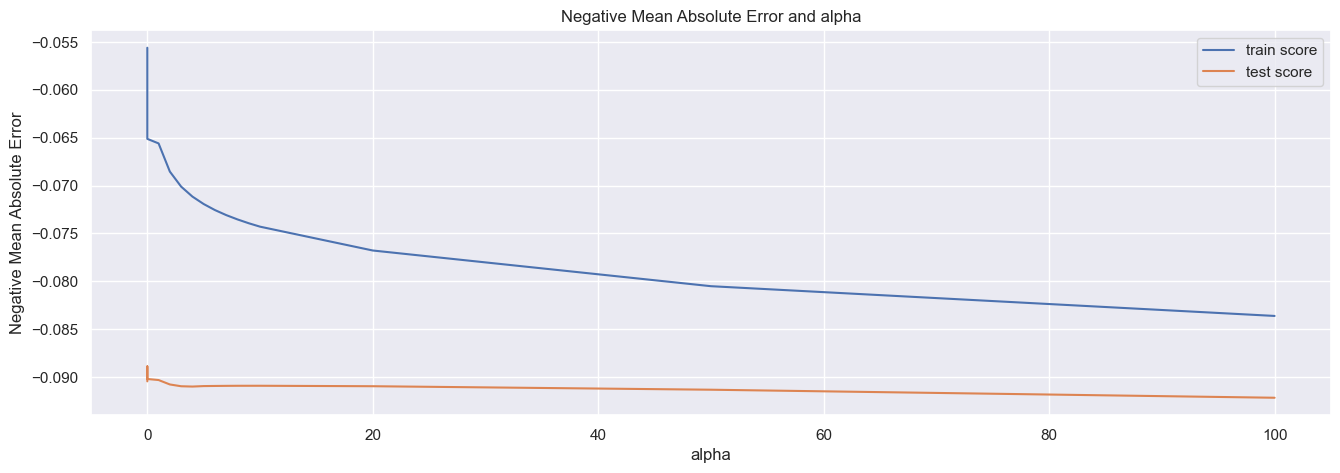

In [138]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [139]:
## Final Ridge

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.13588683e-02,  1.89916299e-02,  7.32788104e-03,  7.96272008e-02,
        4.07795269e-02,  3.72507374e-02,  2.05612877e-02, -2.78758819e-03,
       -1.30338491e-03,  7.00573179e-03,  4.35785540e-03,  5.54550229e-03,
        1.48199078e-02,  3.71802799e-02,  4.20642007e-02,  8.38654798e-04,
        6.23082078e-02,  2.96128365e-02,  2.70973194e-03,  1.87339625e-02,
        1.07448695e-02,  1.20910988e-02, -1.36071727e-02,  1.55763919e-02,
        2.26747431e-03, -1.68263637e-07,  4.02874958e-02,  4.26597599e-03,
        1.44157825e-03,  1.36107502e-02, -2.04563445e-03,  8.78571434e-03,
        7.21095211e-03,  1.06190229e-02, -1.48411310e-02, -1.44232684e-06,
       -1.10809910e-03, -6.42496907e-03,  4.82665535e-02,  3.90986114e-02,
        6.20215882e-02,  1.56874684e-02,  2.13182526e-03,  2.59755306e-02,
        2.43135413e-02, -5.00428493e-02,  4.82153805e-03,  3.82124377e-02,
        3.57786634e-02,  4.68949873e-02, -1.30779083e-02,  3.69460173e-02,
       -3.54873205e-02, -

In [142]:
### Let us check R-Squared Value

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9220052574594756


In [143]:
### Let us Predict on the test data set

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8855287818493234


#### Lasso Regression

In [144]:
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [145]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [146]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08335757905208412


In [147]:
## Final Lasso Model

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [148]:
## Predict the R-Squared value for Train Data

y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9174442574972889


In [149]:
## Predict the R-Squared value for Test Data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8551231928174821


In [150]:
mean_squared_error(y_test, y_test_pred)

0.023838046736017547

In [151]:
lasso.coef_

array([-1.58986880e-02,  1.77328839e-02,  7.45493006e-03,  8.92609173e-02,
        4.49733107e-02,  5.24420084e-02,  2.11904683e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.73403190e-02,
        1.31726648e-02,  5.57365739e-04,  0.00000000e+00, -2.81043595e-03,
        1.18031173e-01,  3.11416982e-02,  2.03120136e-03,  1.33933861e-02,
        8.44317064e-03,  5.66696196e-03, -1.15603901e-02,  1.31358396e-02,
        6.75562031e-03, -1.47256115e-06,  3.89265887e-02,  5.91793364e-03,
        1.83237079e-03,  1.28752008e-02, -0.00000000e+00,  6.00119886e-03,
        5.33435901e-03,  1.05851336e-02, -1.35222907e-02, -9.35029429e-04,
       -1.36117711e-03, -5.93902219e-03,  0.00000000e+00,  0.00000000e+00,
        4.66696364e-02, -7.07128010e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.49559431e-03, -0.00000000e+00,  2.89713629e-02,
       -0.00000000e+00, -

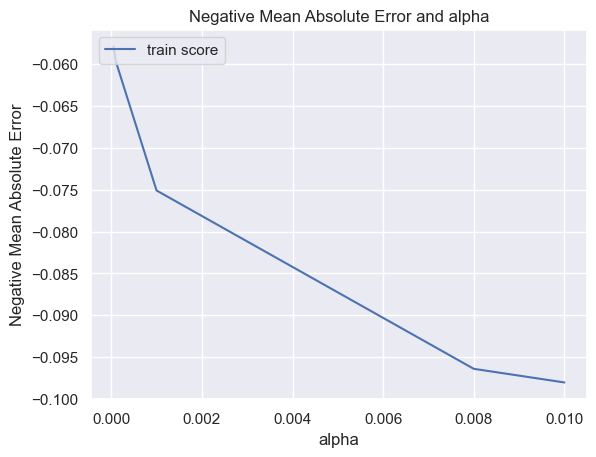

In [152]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [153]:
model_cv.best_params_

{'alpha': 0.1}

In [154]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9575101480652919
0.7491779353883843


In [155]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [156]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,10.861106
114,RoofMatl_Membran,0.434654
39,MSZoning_FV,0.401680
41,MSZoning_RL,0.401634
40,MSZoning_RH,0.396982
42,MSZoning_RM,0.354847
116,RoofMatl_Roll,0.307542
115,RoofMatl_Metal,0.303696
119,RoofMatl_WdShngl,0.294295
237,PoolQC_No_Pool,0.248244


In [157]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9174442574972889
0.8551231928174821


##### The best alpha value for Lasso : {'alpha': 0.001}
##### The best alpha value for Ridge : {'alpha': 0.1}

##### Conclusion:

After Comparing both the model it is clearly evident that the below feautures can be used for explaining the Dataset

- MSSubClass
- RoofMatl_Membran
- MSZoning_RL
- MSZoning_FV
- MSZoning_RH
- MSZoning_RM
- Condition2_PosA
- RoofMatl_WdShngl

